In [5]:
import matplotlib.pyplot as plt
import numpy as np

try:
    import SafeRLBench as srb
    import SafeRLBench.envs as envs
    import SafeRLBench.tools as tools
except ImportError:
    import sys
    import os
    module_path = os.path.abspath('..')
    sys.path.append(module_path)
    import SafeRLBench as srb
    import SafeRLBench.envs as envs
    import SafeRLBench.tools as tools
    
np.set_printoptions(precision=5)

In [6]:
lincar = envs.LinearCar()

#policy_par = lambda par: (lambda x: par[0] + par[1:].dot(x))

policy_par = lambda par: (lambda x: np.exp(par[0] - par[1:].dot(x)) - 1.5)

policy = tools.Policy(policy_par,(3))
optimizer = srb.PolicyGradient(lincar, estimator='central_fd', max_it=10000, eps=0.000001,  
                       parameter_domain=np.array([0,1]), rate = 1)
optimizer.estimator.var = 0.5

In [8]:
par, conv = optimizer.optimize(policy)

Start Central Finite Differences optimization:
Initial Parameters: [ 0.73464  0.87948  0.81683]
Run: 0  	Parameter: 	[ 0.73464  0.87948  0.81683]	Reward: -58.9279990679
		Gradient: 	[ 2.16576 -1.01555 -0.05632]
Run: 100  	Parameter: 	[ 4.56072  5.01647  5.28221]	Reward: -30.1352221258
		Gradient: 	[-0.01998 -0.04968  0.0511 ]
		Average Time: 	0.01s/step
Run: 200  	Parameter: 	[ 3.54241  3.27073  9.03446]	Reward: -17.129380101
		Gradient: 	[ 0.06123 -0.06942  0.02254]
		Average Time: 	0.01s/step
Run: 300  	Parameter: 	[  3.64152   3.6611   10.78174]	Reward: -19.7635962987
		Gradient: 	[ 0.28427 -0.27458  0.00982]
		Average Time: 	0.01s/step
Run: 400  	Parameter: 	[  4.16895   3.51923  12.22331]	Reward: -18.9816493187
		Gradient: 	[-0.48317  0.47738  0.01257]
		Average Time: 	0.01s/step
Run: 500  	Parameter: 	[  4.00813   4.05285  13.4593 ]	Reward: -18.6864388242
		Gradient: 	[ 0.28282 -0.26849  0.00693]
		Average Time: 	0.01s/step
Run: 600  	Parameter: 	[  4.0426    4.27212  14.55903]	R

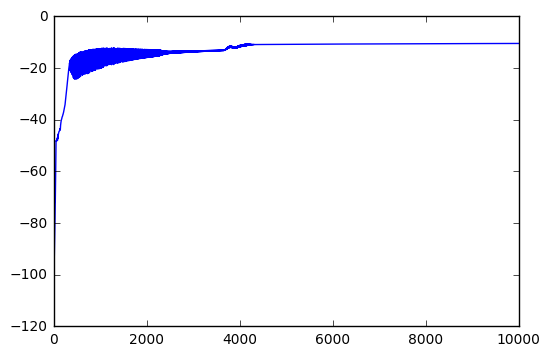

In [8]:
rewards = optimizer.rewards
plt.plot(np.arange(0,len(rewards)),rewards)
plt.show()

Best Parameter:	[  8.72239   8.3446   42.5139 ]
Best Reward: 	-10.4552116712


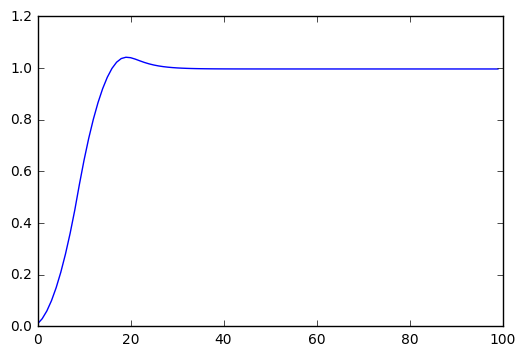

In [9]:
print("Best Parameter:\t"+str(optimizer.best_parameter))
print("Best Reward: \t"+str(optimizer.best_reward))

policy.setParameter(optimizer.best_parameter)
trace, i, achieved = executer.rollout(policy)

y = np.array([t[0] for t in [s[1] for s in trace]])
x = np.arange(0,i+1)

plt.plot(x,y)
plt.show()

In [5]:
policy_par = lambda par: (lambda x: par[0] + par[1:].dot(x))

#policy_par = lambda par: (lambda x: np.exp(par[0] - par[1:].dot(x)) - 1.5)

policy = tools.Policy(policy_par,(3))
optimizer = srb.PolicyGradient(executer, lincar, estimator='forward_fd', max_it=1000, eps=0.0001,  
                       parameter_domain=np.array([-1,1]), rate = 0.2)
optimizer.estimator.var = 0.5

In [6]:
par, conv = optimizer.optimize(policy)

KeyboardInterrupt: 

In [ ]:
rewards = optimizer.rewards
plt.plot(np.arange(0,len(rewards)),rewards)
plt.show()

Best Parameter: [  5.54976  -6.31094 -10.8346 ]
Best Reward: -27.5753021636


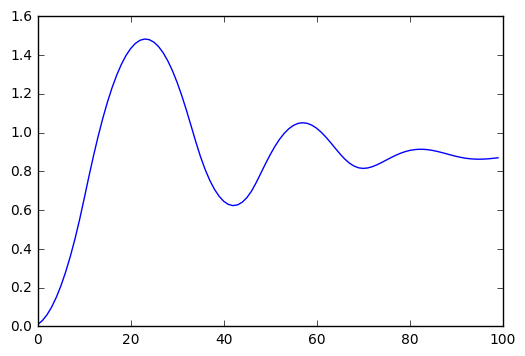

In [8]:
print("Best Parameter: "+str(optimizer.best_parameter))
print("Best Reward: "+str(optimizer.best_reward))

policy.setParameter(optimizer.best_parameter)
trace, i, achieved = executer.rollout(policy)

y = np.array([t[0] for t in [s[1] for s in trace]])
x = np.arange(0,i+1)

plt.plot(x,y)
plt.show()